### 1. Setup and Initial Data Loading

This section imports necessary libraries and loads the raw data from `claimdata.txt` into a pandas DataFrame. It also performs an initial inspection of the data.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw/claimdata.txt", sep='|')
df.head()

C:\Users\Hwendifraw\AppData\Local\Temp\ipykernel_13000\2314504363.py:5: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/claimdata.txt", sep='|')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


# 2. Initial Data Inspection

Check the shape of the DataFrame (number of rows and columns), data types of each column, and the count of missing values to understand the data's structure and quality.


In [ ]:
# Check the shape of the DataFrame
print("\nDataFrame shape:")
print(df.shape)

# Check data types
print("\nDataFrame dtypes:")
print(df.dtypes)

# Check for missing values
print("\nMissing values count (sorted descending):")
print(df.isna().sum().sort_values(ascending=False))


**bold text**# 4. Loss Ratio Analysis

This section calculates the overall loss ratio and then breaks it down by `Province`, `VehicleType`, and `Gender`. The results are then visualized using bar charts.

In [10]:
# Calculate Overall Loss Ratio
total_claims_sum = df['TotalClaims'].fillna(0).sum()
total_premium_sum = df['TotalPremium'].fillna(0).sum()

if total_premium_sum != 0:
    overall_loss_ratio = total_claims_sum / total_premium_sum
    print(f"Overall Loss Ratio: {overall_loss_ratio:.4f}")
else:
    print("Total Premium is zero, cannot calculate loss ratio.")

# Calculate Loss Ratio by Province
province_loss_ratio = df.groupby('Province').apply(lambda x:
    x['TotalClaims'].fillna(0).sum() / x['TotalPremium'].fillna(0).sum() if x['TotalPremium'].fillna(0).sum() != 0 else 0
).reset_index(name='LossRatio')

print("\nLoss Ratio by Province (first 5 rows):")
print(province_loss_ratio.head())

# Calculate Loss Ratio by VehicleType
vehicle_type_loss_ratio = df.groupby('VehicleType').apply(lambda x:
    x['TotalClaims'].fillna(0).sum() / x['TotalPremium'].fillna(0).sum() if x['TotalPremium'].fillna(0).sum() != 0 else 0
).reset_index(name='LossRatio')

print("\nLoss Ratio by VehicleType (first 5 rows):")
print(vehicle_type_loss_ratio.head())

# Calculate Loss Ratio by Gender
gender_loss_ratio = df.groupby('Gender').apply(lambda x:
    x['TotalClaims'].fillna(0).sum() / x['TotalPremium'].fillna(0).sum() if x['TotalPremium'].fillna(0).sum() != 0 else 0
).reset_index(name='LossRatio')

print("\nLoss Ratio by Gender:")
print(gender_loss_ratio.head())


Overall Loss Ratio: 1.0477


C:\Users\Hwendifraw\AppData\Local\Temp\ipykernel_13000\1977008784.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  province_loss_ratio = df.groupby('Province').apply(lambda x:



Loss Ratio by Province (first 5 rows):
        Province  LossRatio
0   Eastern Cape   0.633813
1     Free State   0.680758
2        Gauteng   1.222018
3  KwaZulu-Natal   1.082693
4        Limpopo   0.661199


C:\Users\Hwendifraw\AppData\Local\Temp\ipykernel_13000\1977008784.py:20: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vehicle_type_loss_ratio = df.groupby('VehicleType').apply(lambda x:



Loss Ratio by VehicleType (first 5 rows):
         VehicleType  LossRatio
0                Bus   0.137292
1   Heavy Commercial   1.628112
2   Light Commercial   0.232066
3  Medium Commercial   1.050251
4  Passenger Vehicle   1.048198

Loss Ratio by Gender:
          Gender  LossRatio
0         Female   0.821879
1           Male   0.883910
2  Not specified   1.059311


C:\Users\Hwendifraw\AppData\Local\Temp\ipykernel_13000\1977008784.py:28: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gender_loss_ratio = df.groupby('Gender').apply(lambda x:


## Visualizations of Loss Ratios

C:\Users\Hwendifraw\AppData\Local\Temp\ipykernel_13000\2557202783.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Province', y='LossRatio', data=province_loss_ratio_sorted, palette='viridis')


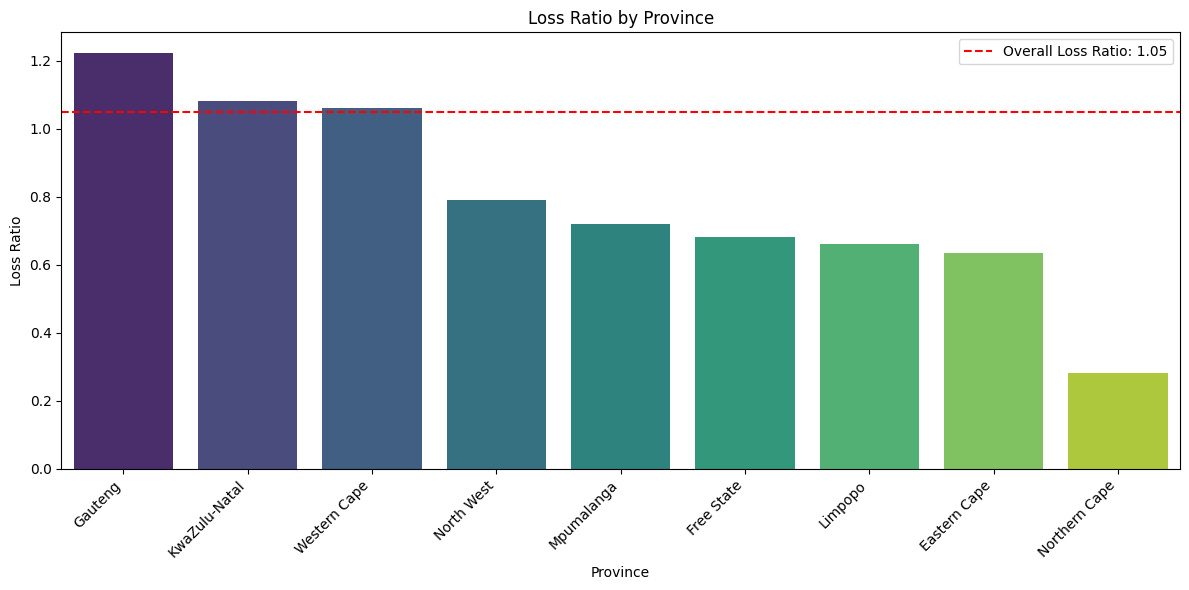

C:\Users\Hwendifraw\AppData\Local\Temp\ipykernel_13000\2557202783.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VehicleType', y='LossRatio', data=vehicle_type_loss_ratio_sorted, palette='viridis')


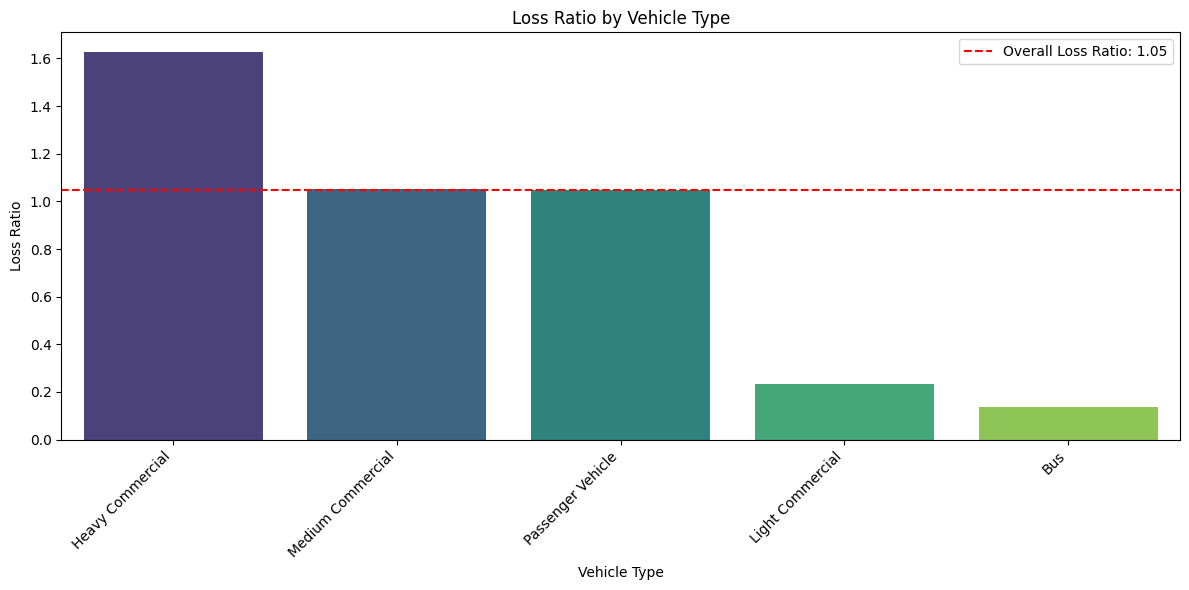

C:\Users\Hwendifraw\AppData\Local\Temp\ipykernel_13000\2557202783.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='LossRatio', data=gender_loss_ratio_sorted, palette='viridis')


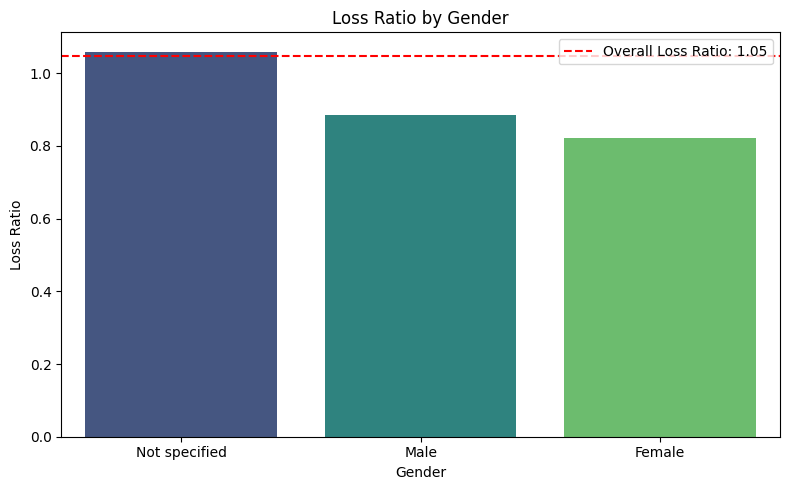

In [13]:
# Sort by LossRatio for better visualization
province_loss_ratio_sorted = province_loss_ratio.sort_values(by='LossRatio', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Province', y='LossRatio', data=province_loss_ratio_sorted, palette='viridis')
plt.title('Loss Ratio by Province')
plt.xlabel('Province')
plt.ylabel('Loss Ratio')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=overall_loss_ratio, color='r', linestyle='--', label=f'Overall Loss Ratio: {overall_loss_ratio:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

# Sort by LossRatio for better visualization
vehicle_type_loss_ratio_sorted = vehicle_type_loss_ratio.sort_values(by='LossRatio', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='VehicleType', y='LossRatio', data=vehicle_type_loss_ratio_sorted, palette='viridis')
plt.title('Loss Ratio by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Loss Ratio')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=overall_loss_ratio, color='r', linestyle='--', label=f'Overall Loss Ratio: {overall_loss_ratio:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

# Sort by LossRatio for better visualization
gender_loss_ratio_sorted = gender_loss_ratio.sort_values(by='LossRatio', ascending=False)

plt.figure(figsize=(8, 5)) # Adjust figure size for fewer categories
sns.barplot(x='Gender', y='LossRatio', data=gender_loss_ratio_sorted, palette='viridis')
plt.title('Loss Ratio by Gender')
plt.xlabel('Gender')
plt.ylabel('Loss Ratio')
plt.axhline(y=overall_loss_ratio, color='r', linestyle='--', label=f'Overall Loss Ratio: {overall_loss_ratio:.2f}')
plt.legend()
plt.tight_layout()
plt.show()


# 5. Re-visualize Distributions of Transformed Variables

After applying transformations to `TotalClaims` and `CustomValueEstimate`, this section re-visualizes their distributions to assess the effectiveness of these changes in reducing skewness and outlier impact.


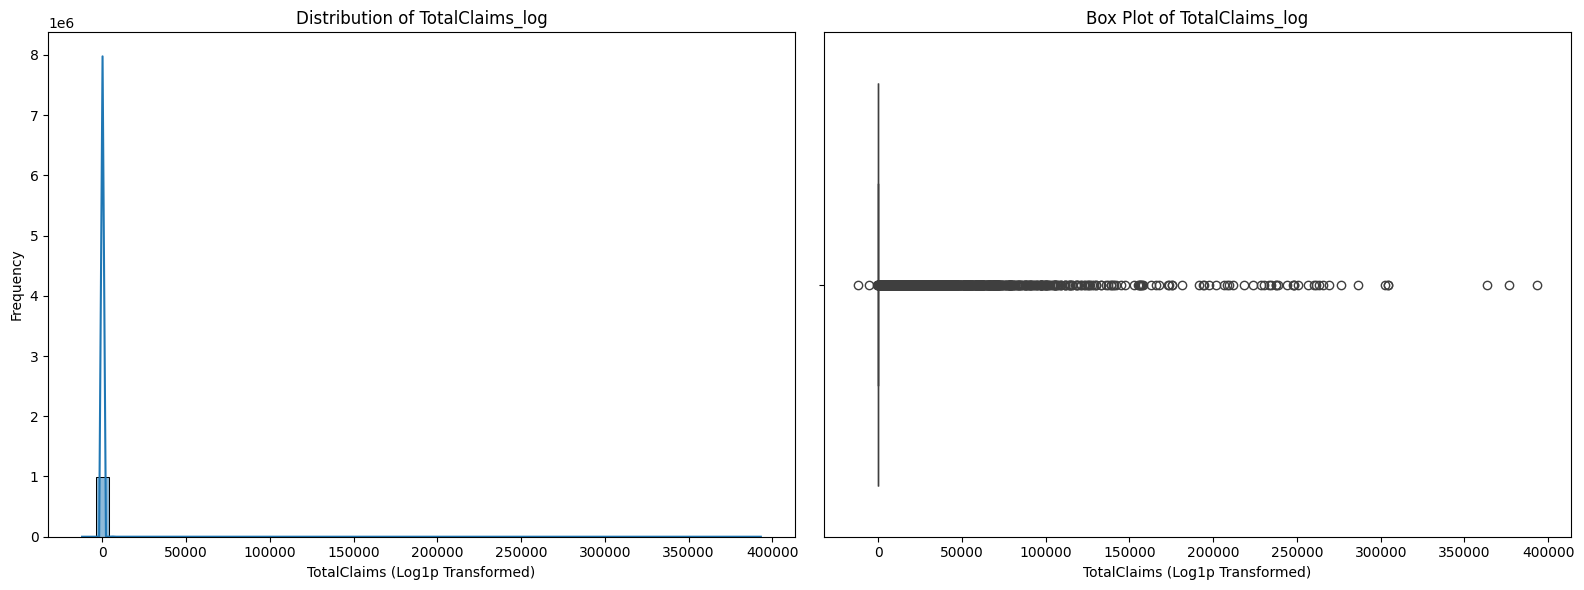

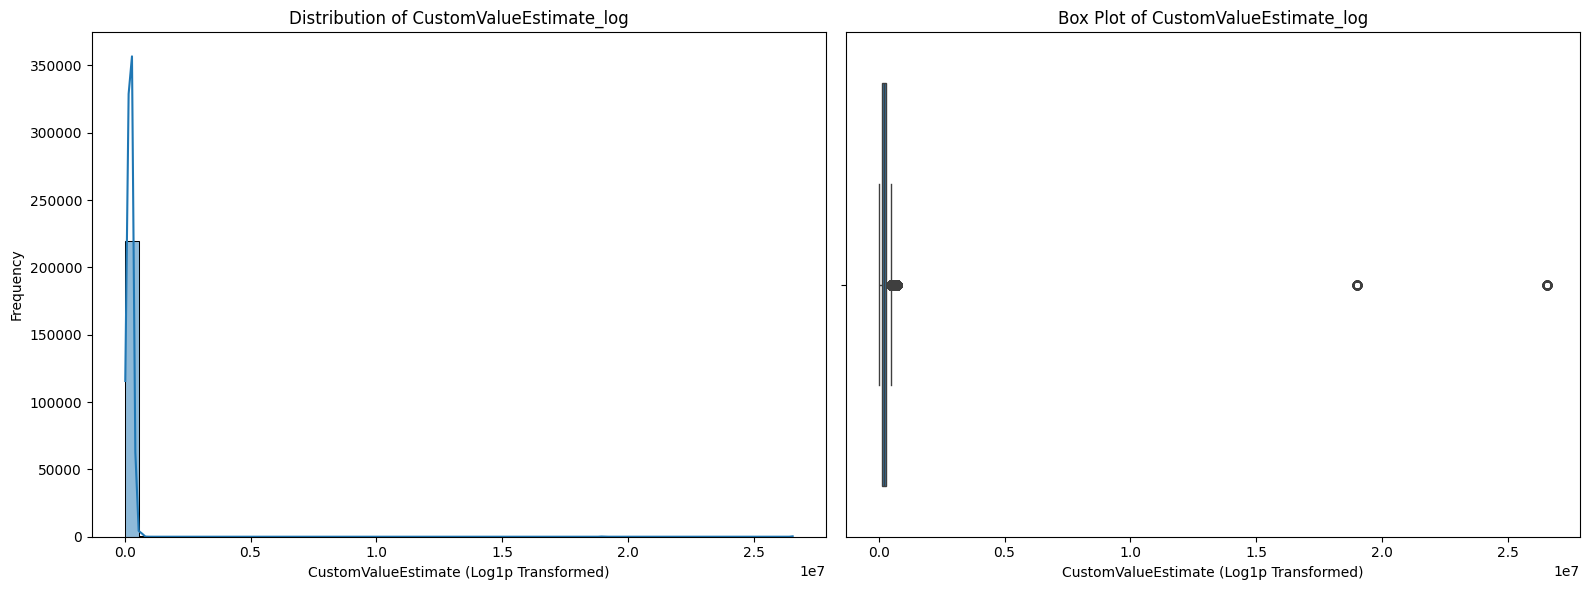

In [19]:
# Re-visualize TotalClaims_log
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(df['TotalClaims'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of TotalClaims_log')
axes[0].set_xlabel('TotalClaims (Log1p Transformed)')
axes[0].set_ylabel('Frequency')

sns.boxplot(x=df['TotalClaims'], ax=axes[1])
axes[1].set_title('Box Plot of TotalClaims_log')
axes[1].set_xlabel('TotalClaims (Log1p Transformed)')

plt.tight_layout()
plt.show()

# Re-visualize CustomValueEstimate_log
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(df['CustomValueEstimate'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of CustomValueEstimate_log')
axes[0].set_xlabel('CustomValueEstimate (Log1p Transformed)')
axes[0].set_ylabel('Frequency')

sns.boxplot(x=df['CustomValueEstimate'], ax=axes[1])
axes[1].set_title('Box Plot of CustomValueEstimate_log')
axes[1].set_xlabel('CustomValueEstimate (Log1p Transformed)')

plt.tight_layout()
plt.show()


# 6. Temporal Trend Analysis

This section extracts month and year from `TransactionMonth`, then calculates and visualizes monthly claim frequency and severity to identify temporal patterns.

In [ ]:
# Extract Month and Year
df['Month'] = df['TransactionMonth'].dt.month
df['Year'] = df['TransactionMonth'].dt.year
df['Period'] = df['TransactionMonth'].dt.to_period('M')

# Calculate monthly claim frequency
monthly_claim_frequency = df[df['TotalClaims'] > 0].groupby('Period').size().reset_index(name='ClaimCount')
monthly_claim_frequency['Period'] = monthly_claim_frequency['Period'].astype(str)

# Calculate monthly claim severity
monthly_claim_severity = df.groupby('Period')['TotalClaims'].sum().reset_index(name='TotalClaimsSum')
monthly_claim_severity['Period'] = monthly_claim_severity['Period'].astype(str)

print("Monthly Claim Frequency (first 5 rows):")
print(monthly_claim_frequency.head())
print("\nMonthly Claim Severity (first 5 rows):")
print(monthly_claim_severity.head())


### Visualizations of Temporal Trends

In [ ]:
plt.figure(figsize=(15, 7))
sns.lineplot(x='Period', y='ClaimCount', data=monthly_claim_frequency)
plt.title('Monthly Claim Frequency Over Time')
plt.xlabel('Period')
plt.ylabel('Number of Claims')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 7))
sns.lineplot(x='Period', y='TotalClaimsSum', data=monthly_claim_severity)
plt.title('Monthly Claim Severity Over Time')
plt.xlabel('Period')
plt.ylabel('Total Claims Amount')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()
